# Quick start2 -Relative-densityratio with multi dimensional samples and optional parameter setting.-

### Generate data

For example,

Generate two samples that follow the 2-dimentional normal distribution of $\mathcal{N(\mu_1,\Sigma_1)}$ and $\mathcal{N(\mu_2,\Sigma_2)}$, respectively, and estimate the relative density ratio
$$r_\alpha (x) = p(x)/(\alpha p(x)+(1-\alpha)q(x)).$$

In [1]:
from src import densityratio
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

import seaborn as sns

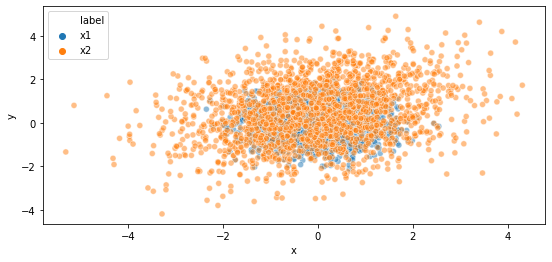

In [2]:
m = [[0.,0.],[0,0.5]]
s = [np.array([[0.5,0],
                [0,0.5]]),
      np.array([[2.0,0.5],
                [0.5,2.0]])]
np.random.seed(10)
x1 = np.random.multivariate_normal(m[0], s[0], size = 2000)
x2 = np.random.multivariate_normal(m[1], s[1], size = 2000)
df = pd.DataFrame({'x':np.r_[x1[:,0],x2[:,0]],'y':np.r_[x1[:,1],x2[:,1]],'label':['x1']*len(x1)+['x2']*len(x2)})

fig = plt.figure(figsize=(9,4))
ax = fig.add_subplot(111)
sns.scatterplot(data=df, x='x', y='y', alpha=0.5,hue='label',ax=ax)
fig.savefig('pic/QS2_samples.png')

### Estimate relative-densityratio and optional parameters setting

If a value is set for *sigma, lamb*, that value is used, and if a numerical array is set, the *densityratio()* selects the optimum value by CV.   
The *alpha* is a parameter that can adjust the mixing ratio, and is set in the range of \[0,1.\].   
The *kernel_number* is the number of kernels in the linear model.

In [3]:
dens = densityratio.densratio(x1,x2,sigma=[0.1, 0.3, 0.5, 0.7, 1., 2., 5.], lamb=[0.01, 0.02, 0.03, 0.04, 0.05],kernel_num=200,alpha=0.2)

/usr/local/lib/python3.7/site-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
100%|██████████| 7/7 [00:12<00:00,  1.83s/it, sigma:1.0,lambda:0.03, score:-1.1130]


Found optimal sigma = 1.0, lambda = 0.03, score=-1.1130110207697999


### Compare the true with estimated.

In this case, the true density ratio $r_\alpha(x)$ is known, so we can compare $r_\alpha(x)$ with the estimated density ratio $\hat{r_\alpha}(x)$.    
The code below gives the following output:

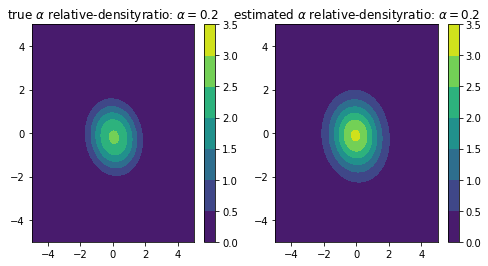

In [4]:
X,Y = np.meshgrid(np.linspace(-5,5,100),np.linspace(-5,5,100))
data = np.c_[X.ravel(),Y.ravel()]
x1_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[0],s[0])
x2_pdf = lambda x: scipy.stats.multivariate_normal.pdf(x,m[1],s[1])
Z_true = x1_pdf(data)/(0.2*x1_pdf(data)+0.8*x2_pdf(data))

fig = plt.figure(figsize=[8,4])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
levels=np.arange(0,4,0.5)
ax1.set_title(r'true $\alpha$ relative-densityratio: $\alpha=0.2$')
ax2.set_title(r'estimated $\alpha$ relative-densityratio: $\alpha=0.2$')
a = ax1.contourf(X,Y,Z_true.reshape(100,100),levels=levels)
b = ax2.contourf(X,Y,dens(np.c_[X.ravel(),Y.ravel()]).reshape(100,100),levels=levels)
fig.colorbar(a, ax=ax1)
fig.colorbar(b, ax=ax2)
fig.savefig('pic/QS2_ratio.png')

To get the parameters used for the density ratio calculation, call the following method.

In [5]:
print('lambda=',dens.lambda_)
print('sigma=',dens.sigma)
print('alpha=',dens.alpha)
print('kernel_num=',dens.N_kernels)
print('kernel_centers',dens.kernel_centers)

lambda= 0.03
sigma= 1.0
alpha= 0.2
kernel_num= 200
kernel_centers [[-0.03916773 -1.22461734]
 [ 0.6569809   0.97760163]
 [ 0.84388417 -1.13223345]
 [ 0.19500762 -0.27526362]
 [ 0.28236709 -1.77587683]
 [ 0.30842958 -0.02681199]
 [-0.00280871 -1.04680791]
 [ 0.47630362 -1.17881346]
 [-0.47932216  0.90751721]
 [-0.91141381 -0.64497291]
 [ 0.38109053 -1.67472321]
 [-0.49997502  0.38655041]
 [-0.98930376 -0.79288913]
 [ 0.04548068 -0.11766637]
 [-1.08647424  0.68242856]
 [ 0.53872738  0.03567413]
 [-0.37940116  0.11402819]
 [ 0.33398717  0.70829904]
 [ 0.57793101  0.84830591]
 [-1.0010887   0.06696889]
 [-0.01828467 -0.79503001]
 [ 0.02008647  0.1527328 ]
 [ 0.7075582   0.47737627]
 [-0.56893185 -0.15039994]
 [ 0.40354121 -0.36265753]
 [ 0.93675445 -0.5307871 ]
 [-0.66204756 -0.52368015]
 [-0.89216652  0.67068681]
 [ 0.91956897  0.37255734]
 [-0.27077195 -0.55321408]
 [-0.33248266  0.42899331]
 [-0.97114012  0.54552963]
 [ 0.65296579  0.36184724]
 [ 0.73836695 -1.37327024]
 [-0.13725122 -1